In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta


%matplotlib inline

In [2]:
# Get the data, we will be working with US data only:
deaths = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [3]:
#Show only the first rows:
deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,4,4,4,4,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,1,1,1,1,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,20,21,23,24,33,39,42,44,45,45
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,1,1,1,1,1


In [4]:
# Show the last 5 rows:
deaths.tail(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3249,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0,0.0,...,0,0,0,0,1,1,1,2,2,3
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3252,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,...,3,3,3,3,3,3,3,0,0,0


In [5]:
# Print the dimentios: so we have 3,253 places and 96 columns:
deaths.shape

(3253, 96)

In [6]:
# Columns names: we can identify time frame here: January 22 2020 to April 14 2020. 
deaths.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20'

In [7]:
# Data types: 

deaths.dtypes

UID          int64
iso2        object
iso3        object
code3        int64
FIPS       float64
            ...   
4/10/20      int64
4/11/20      int64
4/12/20      int64
4/13/20      int64
4/14/20      int64
Length: 96, dtype: object

In [8]:
# Basic stats:
deaths.iloc[:, 12:].describe()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
count,3253.0,3253.0,3253.0,3253.0,3253.0,3253.0,3253.0,3253.0,3253.0,3253.0,...,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.917000,3.314786,3.910544,4.517061,5.065171,5.711958,6.288657,6.767292,7.230249,7.937903
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.045591,62.840388,72.533656,82.727186,93.285134,105.518921,115.480295,125.052295,133.328697,143.621977
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3048.000000,3485.000000,4009.000000,4571.000000,5150.000000,5820.000000,6367.000000,6898.000000,7349.000000,7905.000000


In [9]:
death_means = deaths.iloc[:, 12:].describe().mean()

In [10]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


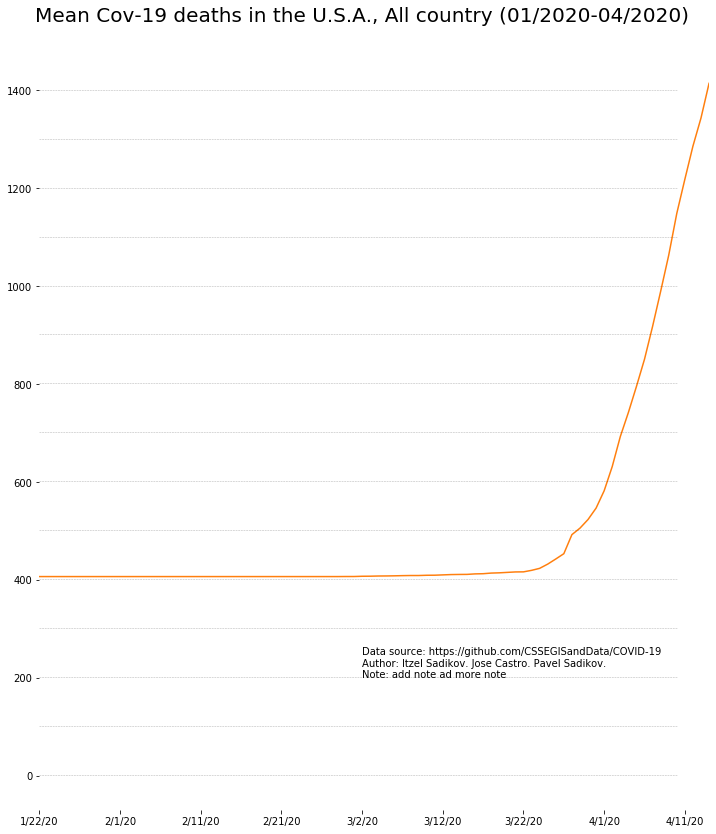

In [11]:
# Same plot but better ;) I copy this format from this website: 
# http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/


# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(12, 14)) 

# Plot the mean deaths per day for any state:
deaths.iloc[:, 12:].describe().mean().plot(color = tableau20[2])

# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  


# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")    


# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

# Plot lines '--'
for y in range(1, 1500, 100):    
    plt.plot(range(0, 80), [y] * len(range(0, 80)), "--", lw=0.5, color="black", alpha=0.3)    

# Make the title big enough so it spans the entire plot, but don't make it    
# so big that it requires two lines to show.    
      
    
# Note that if the title is descriptive enough, it is unnecessary to include    
# axis labels; they are self-evident, in this plot's case.    
plt.text(40, 1540, "Mean Cov-19 deaths in the U.S.A."    
       ", All country (01/2020-04/2020)", fontsize=20, ha="center") ;  


# Always include your data source(s) and copyright notice! And for your    
# data sources, tell your viewers exactly where the data came from,    
# preferably with a direct link to the data. Just telling your viewers    
# that you used data from the "U.S. Census Bureau" is completely useless:    
# the U.S. Census Bureau provides all kinds of data, so how are your    
# viewers supposed to know which data set you used?    
plt.text(40, 200, "Data source: https://github.com/CSSEGISandData/COVID-19"    
       "\nAuthor: Itzel Sadikov. Jose Castro. Pavel Sadikov."    
       "\nNote: add note "    
       "ad more note", fontsize=10) ;

       



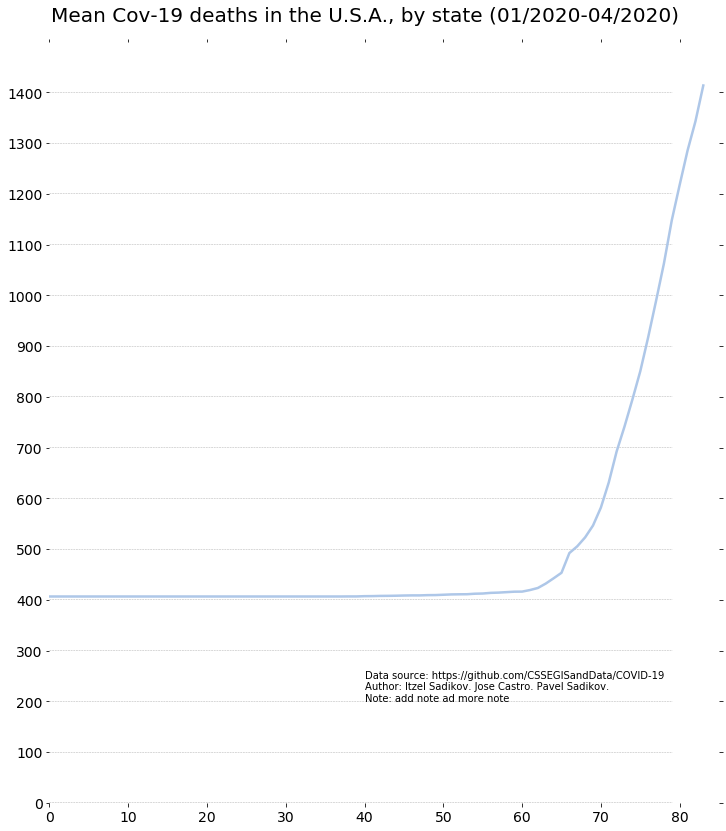

In [12]:
# Same plot but better ;) I copy this format from this website: 
# http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(12, 14))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, 1500)    
plt.xlim(0, 85)    
  
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(range(0, 1500, 100), [str(x) + "" for x in range(0, 1500, 100)], fontsize=14)    
plt.xticks(fontsize=14)  

# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
for y in range(1, 1500, 100):    
    plt.plot(range(0, 80), [y] * len(range(0, 80)), "--", lw=0.5, color="black", alpha=0.3)    
  

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")    

# Now that the plot is prepared, it's time to actually plot the data!    
   
  
  
plt.plot(death_means.values,    
         
            lw=2.5, color=tableau20[1]) 


# matplotlib's title() call centers the title on the plot, but not the graph,    
# so I used the text() call to customize where the title goes.    
  
# Make the title big enough so it spans the entire plot, but don't make it    
# so big that it requires two lines to show.    
      
    
# Note that if the title is descriptive enough, it is unnecessary to include    
# axis labels; they are self-evident, in this plot's case.    
plt.text(40, 1540, "Mean Cov-19 deaths in the U.S.A."    
       ", by state (01/2020-04/2020)", fontsize=20, ha="center") ;  


# Always include your data source(s) and copyright notice! And for your    
# data sources, tell your viewers exactly where the data came from,    
# preferably with a direct link to the data. Just telling your viewers    
# that you used data from the "U.S. Census Bureau" is completely useless:    
# the U.S. Census Bureau provides all kinds of data, so how are your    
# viewers supposed to know which data set you used?    
plt.text(40, 200, "Data source: https://github.com/CSSEGISandData/COVID-19"    
       "\nAuthor: Itzel Sadikov. Jose Castro. Pavel Sadikov."    
       "\nNote: add note "    
       "ad more note", fontsize=10) ;

   
  
# Finally, save the figure as a PNG.    
# You can also save it as a PDF, JPEG, etc.    
# Just change the file extension in this call.    
# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.    
#plt.savefig("percent-bachelors-degrees-women-usa.png", bbox_inches="tight")

In [13]:
# So U.S.A include  6 differents areas like puerto rico (PRI) lets see
deaths.iso3.unique()

array(['ASM', 'GUM', 'MNP', 'PRI', 'VIR', 'USA'], dtype=object)

In [14]:
deaths.iso2.unique()

array(['AS', 'GU', 'MP', 'PR', 'VI', 'US'], dtype=object)

In [15]:
deaths.Province_State.unique()

array(['American Samoa', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Diamond Princess',
       'Grand Princess'], dtype=object)

# By ISO3

In [16]:
state_deaths = deaths[deaths.iso2 == 'US'].groupby('Province_State').sum().iloc[:, 11:]
state_deaths.head(10)

,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,45,49,64,66,70,80,92,93,99,114
Alaska,0,0,0,0,0,0,0,0,0,0,...,6,6,6,7,7,7,8,8,8,9
Arizona,0,0,0,0,0,0,0,0,0,0,...,64,65,73,80,89,97,108,115,122,131
Arkansas,0,0,0,0,0,0,0,0,0,0,...,16,16,18,18,21,21,25,27,29,32
California,0,0,0,0,0,0,0,0,0,0,...,348,380,432,495,544,583,605,641,715,768
Colorado,0,0,0,0,0,0,0,0,0,0,...,140,150,179,193,193,226,250,289,306,327
Connecticut,0,0,0,0,0,0,0,0,0,0,...,189,206,277,326,380,448,494,554,602,671
Delaware,0,0,0,0,0,0,0,0,0,0,...,14,15,16,19,23,32,33,35,41,43
Diamond Princess,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df1 = deaths[deaths.iso2 == 'US'].groupby('Province_State').sum().iloc[:, 11:].T
df1.index

Index(['1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20',
       '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20',
       '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20',
       '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20'],
      dtype='object')

In [43]:
df1.Alabama.values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   1,   4,   4,  10,  10,  23,
        27,  32,  38,  44,  45,  49,  64,  66,  70,  80,  92,  93,  99,
       114])

In [80]:
# Before plot lest find oour limits:
df1.describe()


Province_State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.0,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,12.227848,1.253165,15.329114,3.873418,95.493671,36.810127,62.291139,4.455696,0.0,6.075949,...,1.050633,14.303797,36.860759,2.215190,5.227848,17.303797,100.392405,0.784810,18.911392,0.025316
std,27.309221,2.493419,32.776133,7.889245,191.011134,78.761418,149.257406,9.952190,0.0,13.800569,...,1.817992,31.538074,79.999957,4.516837,8.891006,37.720753,156.377536,1.892434,41.196275,0.158088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,7.000000,2.000000,73.000000,17.500000,20.000000,0.500000,0.0,2.500000,...,1.000000,3.000000,18.000000,1.000000,8.500000,9.500000,141.500000,0.000000,8.500000,0.000000
max,114.000000,9.000000,131.000000,32.000000,768.000000,327.000000,671.000000,43.000000,0.0,67.000000,...,6.000000,124.000000,342.000000,18.000000,29.000000,154.000000,530.000000,9.000000,170.000000,1.000000


In [117]:
# The max y:
y_max = df1.max().sort_values(ascending = False)[0]

x_max = df1.shape[0]

Text(39.5, 10847, 'Cov-19 deaths in the U.S.A., by state (01/27-02/14, 2020)')

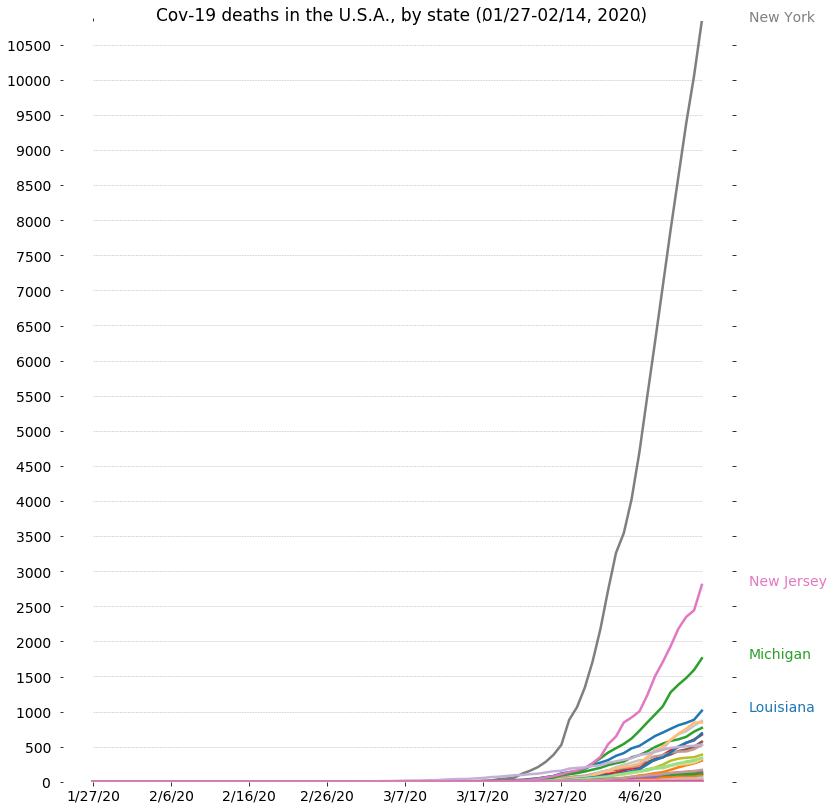

In [161]:
# Read the data into a pandas DataFrame.    
df1

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229),(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229),(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(12, 14))    

# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, y_max)    
#plt.xlim(1968, 2014)    

# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(range(0, y_max, 500), [str(x) + " " for x in range(0, y_max, 500)], fontsize=14)    
plt.xticks(range(0, x_max, 10),fontsize=14)    

# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
for y in range(1, y_max, 500):    
    plt.plot(range(0, x_max), [y] * len(range(0, x_max)), "--", lw=0.5, color="black", alpha=0.3)    

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
            labelbottom="on", left="off", right="off", labelleft="on")    

# Now that the plot is prepared, it's time to actually plot the data!    
# Note that I plotted the majors in order of the highest % in the final year.    
majors = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
            'Connecticut', 'Delaware', 'Diamond Princess', 'District of Columbia',
            'Florida', 'Georgia', 'Grand Princess', 'Hawaii', 'Idaho', 'Illinois',
            'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
            'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
            'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
            'New Jersey', 'New Mexico', 'New York', 'North Carolina',
            'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
            'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
            'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
            'Wisconsin', 'Wyoming'] 

for rank, column in enumerate(majors):    
# Plot each line separately with its own color, using the Tableau 20    
# color set in order.    
    plt.plot(df1.index,    
             df1[column.replace("\n", " ")].values,    
             lw=2.5, color=tableau20[rank])    

# Add a text label to the right end of every line. Most of the code below    
# is adding specific offsets y position because some labels overlapped.    
    y_pos = df1[column.replace("\n", " ")].values[-1] - 0.5    

# Again, make sure that all labels are large enough to be easily read    
# by the viewer. 

    if df1[column.replace("\n", " ")].values[-1] - 0.5 >1000: 
            
        plt.text(x_max+5, y_pos, column, fontsize=14, color=tableau20[rank])    
       
    
if column == "Alaska":    
    y_pos += 0.5        
elif column == "Arizona":    
    y_pos += 0.75    
elif column == "Arkandas":    
    y_pos -= 0.25    
elif column == "California":    
    y_pos += 1.25    
elif column == "Colorado":    
    y_pos += 0.25    
elif column == "Connecticut":    
    y_pos -= 0.75    
elif column == "Delaware":    
    y_pos += 0.75    
elif column == "Diamond Princess":    
    y_pos -= 0.75    
elif column == "District of Columbia":    
    y_pos += 0.75    
elif column == "Florida":    
    y_pos -= 0.25    
elif column == "Georgia":    
    y_pos -= 0.5    
elif column == "Grand Princess":    
    y_pos += 0.75    
elif column == "Hawaii":    
    y_pos -= 0.25    
elif column == "Idaho":    
    y_pos += 1.25    
elif column == "Illinois":    
    y_pos += 0.25    
elif column == "Indiana":    
    y_pos -= 0.75    
elif column == "Iowa":    
    y_pos += 0.75    
elif column == "Kansas":    
    y_pos -= 0.75    
elif column == "Kentucky":    
    y_pos += 0.75    
elif column == "Louisiana":    
    y_pos -= 0.25  
    
# Note that if the title is descriptive enough, it is unnecessary to include    
# axis labels; they are self-evident, in this plot's case.    
plt.text(x_max/2, y_max+5, "Cov-19 deaths in the U.S.A., by state (01/27-02/14, 2020)", fontsize=17, ha="center")    

# Always include your data source(s) and copyright notice! And for your    
# data sources, tell your viewers exactly where the data came from,    
# preferably with a direct link to the data. 

#plt.text(1966, -8, "Data source: nces.ed.gov/programs/digest/2013menu_tables.asp"    
#           "\nAuthor: Randy Olson (randalolson.com / @randal_olson)"    
#           "\nNote: Some majors are missing because the historical data "    
#           "is not available for them", fontsize=10)    

# Finally, save the figure as a PNG.        
# plt.savefig("percent-bachelors-degrees-women-usa.png", bbox_inches="tight")      


In [168]:
df1['Arizona'.replace("\n", " ")].values[-1] - 0.5 

130.5

In [167]:
df1['Massachusetts'.replace("\n", " ")].values[-1] - 0.5  

843.5

In [160]:
df1

Province_State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/27/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/28/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/29/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/30/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/31/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/10/20,80,7,97,21,583,226,448,32,0,38,...,6,98,238,13,24,121,483,5,128,0
4/11/20,92,8,108,25,605,250,494,33,0,47,...,6,106,266,13,25,130,495,5,137,0
4/12/20,93,8,115,27,641,289,554,35,0,50,...,6,106,283,13,27,141,506,6,144,0
4/13/20,99,8,122,29,715,306,602,41,0,52,...,6,109,305,13,28,149,513,8,154,1
